# Convolutional Neural Network model to classify animals images into their respective species

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

## Data Preparation

In [2]:
# Defining constants

data_dir = "C://Users//samso//Downloads//animals5//Data"
img_size = (224, 224)  # Size of the images
batch_size = 32  # Batch size for data generators

In [3]:
# Initializing ImageDataGenerator for data augmentation and normalization

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing pixel values to [0, 1]
    validation_split=0.1, 
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.2,  
    shear_range=0.2,  # Applying shear transformation with 20% intensity
    zoom_range=0.2,  
    horizontal_flip=True  # Randomly flipping images horizontally
)

### Creating data generators for training and validation

In [4]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Using training subset
    seed=42
)

Found 3600 images belonging to 4 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Using validation subset
    seed=42
)

Found 400 images belonging to 4 classes.


In [6]:
num_classes = len(train_generator.class_indices)
print("Class indices:", train_generator.class_indices)

Class indices: {'Buffalo': 0, 'Elephant': 1, 'Rhino': 2, 'Zebra': 3}


In [7]:
# Calculating number of steps per epoch for training and validation
steps_per_epoch_train = train_generator.samples // batch_size
steps_per_epoch_validation = validation_generator.samples // batch_size

print(steps_per_epoch_train)
print(steps_per_epoch_validation)

112
12


## Model Architecture

In [8]:
# Defining the CNN model
model = Sequential()

# Convolutional layers with batch normalization and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Flattening layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

In [10]:
# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Using adam optimizer


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,884 (42.61 MB)

 Trainable params: 11,170,180 (42.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [12]:
epochs = 20

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20


C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.5246 - loss: 1.3574 - val_accuracy: 0.2725 - val_loss: 1.9386
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.752.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


113/113 ━━━━━━━━━━━━━━━━━━━━ 111s 970ms/step - accuracy: 0.6534 - loss: 0.8396 - val_accuracy: 0.2525 - val_loss: 1.7923
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 118us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 109s 954ms/step - accuracy: 0.6707 - loss: 0.7965 - val_accuracy: 0.3125 - val_loss: 1.7432
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 103s 901ms/step - accuracy: 0.7066 - loss: 0.7126 - val_accuracy: 0.4100 - val_loss: 1.3624
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 107s 931ms/step - accuracy: 0.7119 - loss: 0.6967 - val_accuracy: 0.5125 - val_loss: 1.1500
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 12

### **Inference**
#### After each epoch the model's training loss is getting decreased while the accuracy is increasing. This is a good sign. It took 736 steps per epoch for training.

In [13]:
# Evaluating the trained model
loss, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.7667 - loss: 0.6124
Validation Loss: 0.6209468245506287
Validation Accuracy: 0.7649999856948853


### **Inference**


#### Validation accuracy is approximately 57.92%.
#### Validation loss is approximately 1.3318.

#### A high validation accuracy and low validation loss indicate that the model is generalizing well to the validation dataset. It took 82 batches for validation.


## Visualizing training and validation (accuracy and loss)

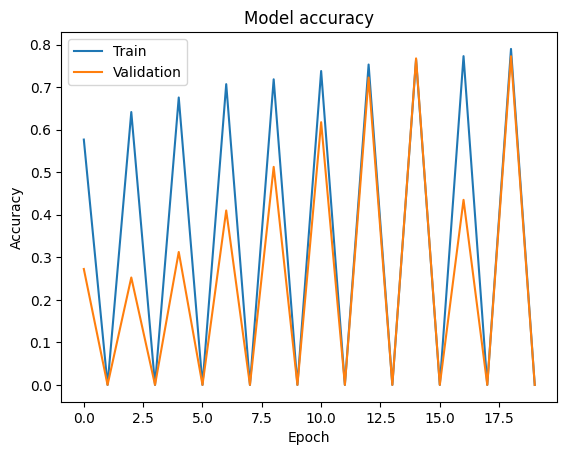

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

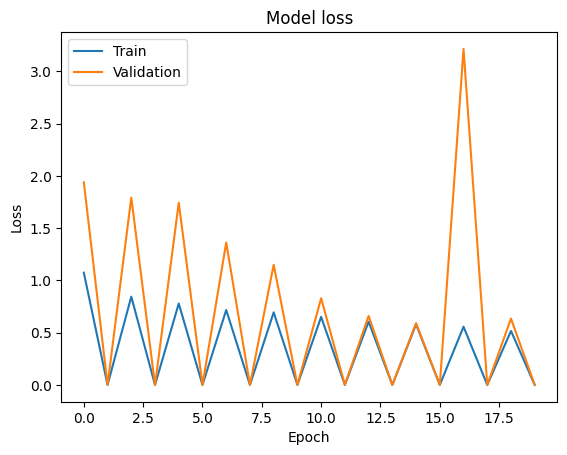

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Inference**

### By this way we can visualize the model's training and validation (accuracy & loss)

# Conclusion

#### Thus the task to build a convolutional neural network model to classify the animal images based on species has been implemented successfully. 

#### While training the model it took 736 steps per epochs, and it gave a good result. The accuracy is increased while the loss is decreased. 
#### For validation it took 82 steps per epochs. Obtained high validation acccuracy and low validation loss shows that the model is working fine. We can use this model in realtime to classify the images.



# Required Packages

In [16]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
